In [1]:
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
import numpy as np

# from matplotlib.mlab import bivariate_normal

import cartopy.crs as ccrs
import xarray as xr

import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec
from matplotlib.ticker import EngFormatter, StrMethodFormatter

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [2]:
Years = ["2000","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13,1): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,29,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [3]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

In [4]:
Nx = 24
Ny = 21
Nz = 6
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


LON0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV0s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV3s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

LON6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LEV6s = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


if Nz!=Nz1: print("Error: Nz!=Nz1!!!")    


(6, 21, 24, 10, 12, 9)


In [5]:
# lifetime: for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_2/Plot_python/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_2/Plot_python/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:05<00:00,  2.30it/s]


In [6]:
# 6-monthly locations: for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_3_QBO/6_monthly_location/'
filename1 = "xyz_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File2 = open(directory1+filename1, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            Lon0 = []
            Lat0 = []
            Lev0 = []
            
            Lon3 = []
            Lat3 = []
            Lev3 = [] 
            
            Lon6 = []
            Lat6 = []
            Lev6 = []            
            for line2 in Lines2:
                a2 = line2.split(',')
                
                Lon0.append(float(a2[0]))
                Lat0.append(float(a2[1]))
                Lev0.append(float(a2[2]))

                Lon3.append(float(a2[9]))
                Lat3.append(float(a2[10]))
                Lev3.append(float(a2[11]))                
                
                Lon6.append(float(a2[-3]))
                Lat6.append(float(a2[-2]))
                Lev6.append(float(a2[-1]))                

    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        
                        LON0s[iz,iy,ix,i_day,i_month,i_year] = Lon0[i]
                        LAT0s[iz,iy,ix,i_day,i_month,i_year] = Lat0[i]
                        LEV0s[iz,iy,ix,i_day,i_month,i_year] = Lev0[i]
                        
                        LON3s[iz,iy,ix,i_day,i_month,i_year] = Lon3[i]
                        LAT3s[iz,iy,ix,i_day,i_month,i_year] = Lat3[i]
                        LEV3s[iz,iy,ix,i_day,i_month,i_year] = Lev3[i]                        
                        
                        LON6s[iz,iy,ix,i_day,i_month,i_year] = Lon6[i]
                        LAT6s[iz,iy,ix,i_day,i_month,i_year] = Lat6[i]
                        LEV6s[iz,iy,ix,i_day,i_month,i_year] = Lev6[i]
                        
                        i = i+1

  0%|          | 0/12 [00:00<?, ?it/s]

/n/home12/hongwei/Paper_3_QBO/6_monthly_location/xyz_20000101.txt


100%|██████████| 12/12 [00:03<00:00,  3.82it/s]


## lifetime vs. initial or 6-month Lat

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lat is: -0.26040928926612644


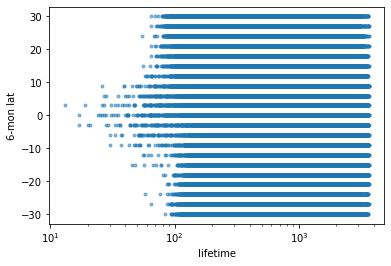

In [9]:
# initial lat

x = lifetime1[3,:,:,:,:,:].flatten()
y = LAT0s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, abs(y)) # use abs because lat can be negative!!!
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lat is: -0.16152824053570752


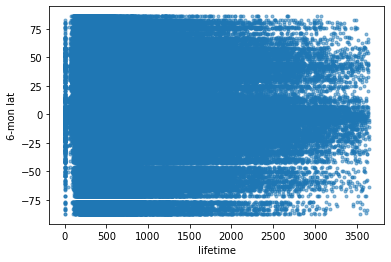

In [10]:
# 3-month lat

x = lifetime1[3,:,:,:,:,:].flatten()
y = LAT3s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, abs(y)) # use abs because lat can be negative!!!
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
# plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");

Number of data sample: (504,), (504,)
R between lifetime and 6-month lat is: -0.5058270096180804


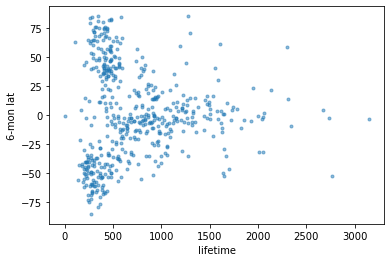

In [12]:
# 6-month lat

x = lifetime1[3,:,:,0,0,0].flatten()
y = LAT6s[3,:,:,0,0,0].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, abs(y)) # use abs because lat can be negative!!!
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
# plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lat is: -0.04227820890527869


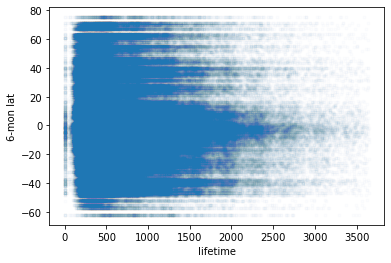

In [14]:
# 6-month lat

x = lifetime1[3,:,:,:,:,:].flatten()
y = LAT6s[3,:,:,:,:,:].flatten() - LAT0s[3,:,:,:,:,:].flatten()
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, abs(y)) # use abs because lat can be negative!!!
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.01)
# plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");

## Lifetime vs. 6-month Lev

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lev is: -0.1255276022053443


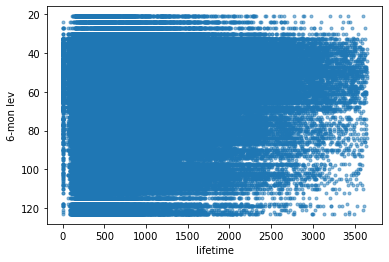

In [157]:
# 3-month lev

x = lifetime1[3,:,:,:,:,:].flatten()
y = LEV3s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, y)
print(f"R between lifetime and 6-month lev is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
# plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel("lifetime")
plt.ylabel("6-mon lev");

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lev is: -0.09988895567500551


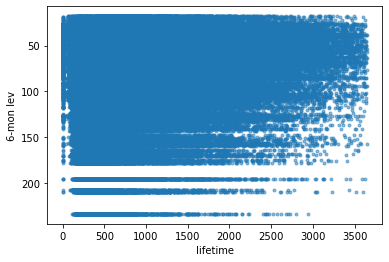

In [158]:
# 6-month lev

x = lifetime1[3,:,:,:,:,:].flatten()
y = LEV6s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, y)
print(f"R between lifetime and 6-month lev is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
# plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel("lifetime")
plt.ylabel("6-mon lev");

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lev is: -0.09988895567500553


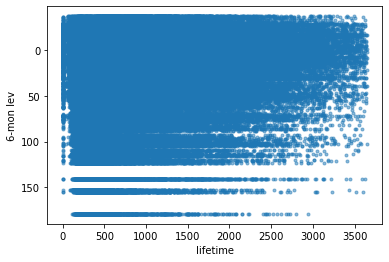

In [163]:
# 6-month lev

x = lifetime1[3,:,:,:,:,:].flatten()
y = LEV6s[3,:,:,:,:,:].flatten()-LEV0s[3,:,:,:,:,:].flatten()
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, y)
print(f"R between lifetime and 6-month lev is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
# plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel("lifetime")
plt.ylabel("6-mon lev");

If the particle is located lower than 75 hPa after 6 month transport, its lifetime would less than 600 days.

For particles that have a lifetime longer than 600 days, it should be located higher than 75 hPa

## Lifetime vs. initial or 6-month Lon

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lat is: 0.0050302887171115775


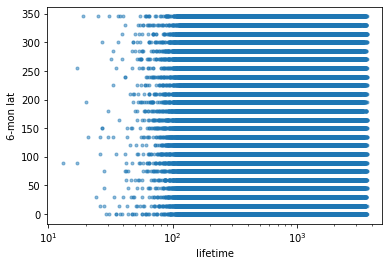

In [159]:
# initial lon

x = lifetime1[3,:,:,:,:,:].flatten()
y = LON0s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, y) 
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");

Number of data sample: (544320,), (544320,)
R between lifetime and 6-month lat is: 0.019857835807108908


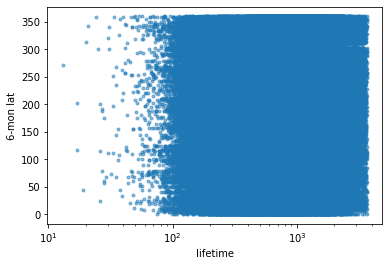

In [160]:
# 6-month lon

x = lifetime1[3,:,:,:,:,:].flatten()
y = LON6s[3,:,:,:,:,:].flatten() 
print(f"Number of data sample: {x.shape}, {y.shape}")

R = np.corrcoef(x, y) 
print(f"R between lifetime and 6-month lat is: {R[0,1]}")

plt.plot(x,y,'.', alpha=0.5)
plt.xscale('log')
plt.xlabel("lifetime")
plt.ylabel("6-mon lat");